# Assignment 2 - Introdução à Aprendizagem Automática

Filipe Pereira (131531)

André Eusébio (127600)

In [1]:
from random import random
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

## Exercicio 1

- Usando a operação binária AND, construir dois vetores, um com todas as combinações de duas entradas binárias e outro com as saidas desejadas.

In [2]:
# Entry values for the binary function (4 combinations)
X = [[0,0], [0, 1], [1, 0], [1,1]]

# list with the desired output
d = [0, 0, 0, 1]

- Criar um percetrão linear para implementar a função binária AND

In [3]:
class LinearPerceptron:

    def __init__(self, w0, w1, w2, X, d, alpha):
        # Constructor that initializes the weights
        self.w0 = w0
        self.w1 = w1
        self.w2 = w2
        self.X = X
        self.d = d
        self.alpha = alpha

    def activation_function(self, x1, x2):
        """
         Function to calculate the output given a x1 and a x2 values
         Parameters:
            x1: first entry
            x2: second entry

         Returns:
            The output (an integer value)
        """
        
        s = self.w0 + self.w1*x1 + self.w2*x2

        if s > 0.5:
            output = 1
        else:
            output = 0

        return output

    def output_vector(self):
        """
         Function to compute the output vector (O) according to the result that comes from the activation function

         Returns:
            A list with the output values
        """

        O = []
        for input in self.X:
            output = self.activation_function(input[0], input[1])
            O.append(output)

        return O

    def error_vector(self):
        """
         Function to compute the error given the output and the desired output

         Returns:
            A list with the error values
        """

        e = []
        O = self.output_vector()

        for i in range(len(self.X)):
            error = self.d[i] - O[i]
            e.append(error)

        return e

    def compute_update_terms(self):
        """
         Function to compute the update terms of the weights for each e entry

         Returns:
            A list with the update terms
        """

        self.dw0 = 0
        self.dw1 = 0
        self.dw2 = 0

        e = self.error_vector()

        for i in range(len(self.X)):
            self.dw0 += self.alpha * e[i]
            self.dw1 += self.alpha * self.X[i][0] * e[i]
            self.dw2 += self.alpha * self.X[i][1] * e[i]

        return [self.dw0, self.dw1, self.dw2]

    def compute_new_weights(self, dw):
      """
        Function to compute the updates weights according to the dw's computed previously

        Returns:
           A list with the updated weights
      """

      dw0, dw1, dw2 = dw

      nw0 = self.w0 + dw0
      nw1 = self.w1 + dw1
      nw2 = self.w2 + dw2

      return [nw0, nw1, nw2]

- Inicializar os pesos $w_0$, $w_1$, $w_2$ com valores aleatórios e criar um vetor O com os resultados saidos da rede;
- Calcular o erro para cada saida (vetor e);
- Calcular os termos de atualização para os pesos

In [4]:
w0 = random()
w1 = random()
w2 = random()

lp = LinearPerceptron(w0, w1, w2, X, d, 10E-4)
O = lp.output_vector()
e = lp.error_vector()
dw = lp.compute_update_terms()

print(f"Desired output: {d}")
print(f"Output with random weights: {O}")
print(f"Error: {e}")
print(f"Update terms: {dw}")

Desired output: [0, 0, 0, 1]
Output with random weights: [0, 0, 0, 1]
Error: [0, 0, 0, 0]
Update terms: [0.0, 0.0, 0.0]


- Durante 20 épocas atualizar os pesos e guardar o valor do erro de cada época

In [5]:
w0 = random()
w1 = random()
w2 = random()

error_history = []
weights_history = []

for i in range(500):
    lp = LinearPerceptron(w0, w1, w2, X, d, 10E-4)
    O = lp.output_vector()
    e = lp.error_vector()
    error = abs(np.sum(e))
    dw = lp.compute_update_terms()
    nw = lp.compute_new_weights(dw)
    w0, w1, w2 = nw

    error_history.append(error)
    weights_history.append(nw)


- Mostre graficamente o valor do erro em cada época

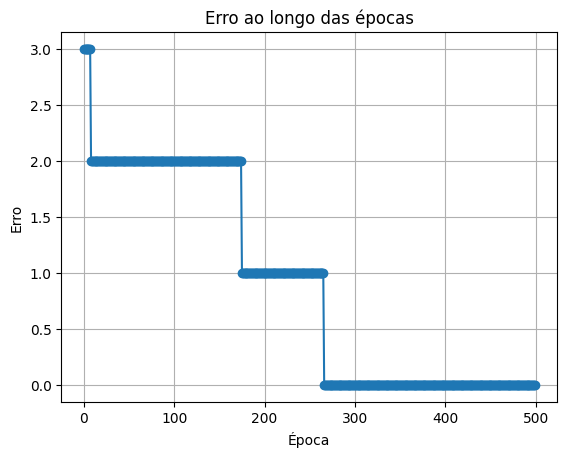

In [6]:
plt.plot(error_history, marker='o')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Erro ao longo das épocas')
plt.grid(True)
plt.show()

Podemos afirmar que foi necessário mais ou menos 270 épocas para o conjunto ser bem classificado

- Mostre graficamente o valor de cada peso após cada atualização

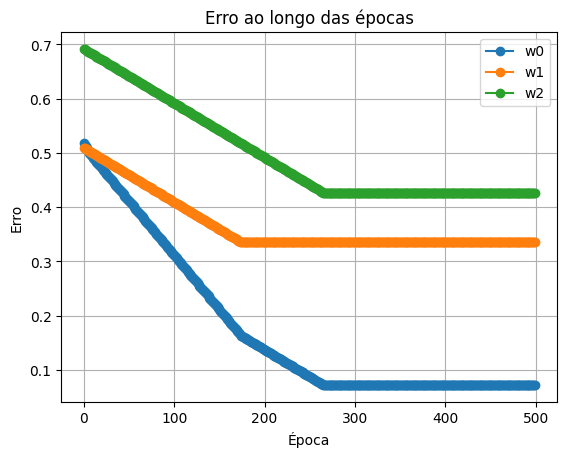

In [7]:
plt.plot(weights_history, marker='o')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Erro ao longo das épocas')
plt.legend(['w0', 'w1', 'w2'])
plt.grid(True)
plt.show()

Gerar um conjunto de pontos 2D usando uma distribuição Gaussiana multivariada.

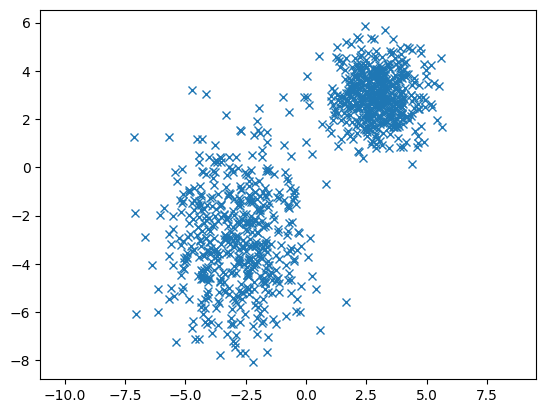

In [8]:
# Define the mean and the covariance for the first dataset
mean = [3, 3]
cov = [[1, 0], [0, 1]]

# Generate 500 samples from a multivariate normal distribution (1st dataset)
a = np.random.multivariate_normal(mean, cov , 500).T

# Define the mean and the covariance for the second dataset
mean = [ -3 , -3]
cov = [ [ 2 , 0] , [0 , 5 ] ]

# Generate 500 samples from a multivariate normal distribution (2nd dataset)
b = np.random.multivariate_normal(mean, cov , 500).T

# Concatenate the datasets alongo the x axis into a single dataset
c = np.concatenate( ( a , b) , axis = 1 )
c = c.T

# Sufle the rows
np.random.shuffle(c)
c = c.T

# Extract the x and y coordinates from the datasets
x = c[0]
y = c[1]

# Plot the points
plt.plot(x , y , 'x')
plt.axis('equal')
plt.show()

- Juntar Coluna ao conjunto A e ao conjunto B a indicar a qual conjunto cada ponto pertence

In [9]:
# Generate 500 0's 
zeros = np.zeros((500, 1))

# Append the ones column to the dataset
a = np.append(a.T, zeros, axis=1).T
a

array([[1.98707288, 2.78311441, 4.45199622, ..., 2.29264398, 3.33339849,
        1.72279237],
       [3.30211214, 3.2646985 , 2.8809839 , ..., 3.89484362, 2.74364569,
        2.47495628],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
# Generate 500 2's 
ones = np.full((500,1), 1)

# Append the ones column to the dataset
b = np.append(b.T, ones, axis=1).T
b

array([[-0.43846293, -2.7300631 , -4.91880896, ..., -0.30760893,
        -1.61719687, -2.65230996],
       [-5.97251225, -1.59218516, -3.7751646 , ..., -2.70872316,
         1.05847545, -5.1551355 ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

- Juntar ambos os novos conjuntos A e B e baralhar

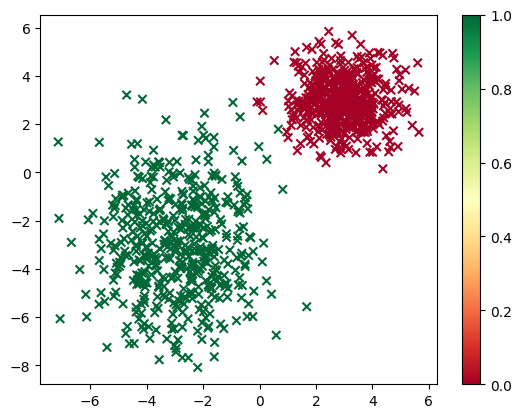

In [11]:
# Concatenate the two datasets into a single dataset
c = np.concatenate((a , b) , axis = 1 )
c = c.T

# Sufle the rows of the dataset
np.random.shuffle(c)
c = c.T

# Extract the x and y coordinates
x = np.array(c[0])
y = np.array(c[1])

# Extract the qualification from the dataset
qualification = np.array(c[2])

scatter = plt.scatter(x, y, c=qualification, cmap='RdYlGn', marker='x')
plt.colorbar(scatter)
plt.show()

- Escrever conjunto para um ficheiro.

In [12]:
# Create a dataFrame object and write the object in the csv file
df_c = pd.DataFrame(c.T, columns=['x','y','qualification'])
df_c.to_csv('2dArray.csv', index=False)

- Usar Conjunto gerado como conjunto de treino para o perceptrão implementado anteriormente

In [13]:
# randomly select the initial values for the weights
w0 = random()
w1 = random()
w2 = random()

# extract the x and y coordinates (train values)
points = np.array(df_c.iloc[:,:2])

# Extract the target values (the qualification)
target = np.array(df_c.iloc[:,2:])

lp = LinearPerceptron(w0, w1, w2, X=points, d=target, alpha=10E-4)
O = lp.output_vector()
e = lp.error_vector()
dw = lp.compute_update_terms()

for i in range(len(O)):
    if target[i] == 0:
        target[i] = 1
    else:
        target[i] = 0

print(f"Desired output: {lp.d}")
print(f"Output with random weights: {O}")
print(f"Error: {e}")
print(f"Update terms: {dw}")

Desired output: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]


- Gráfico com pontos qualificados (corretamente/ incorretamente) com o perceptrão

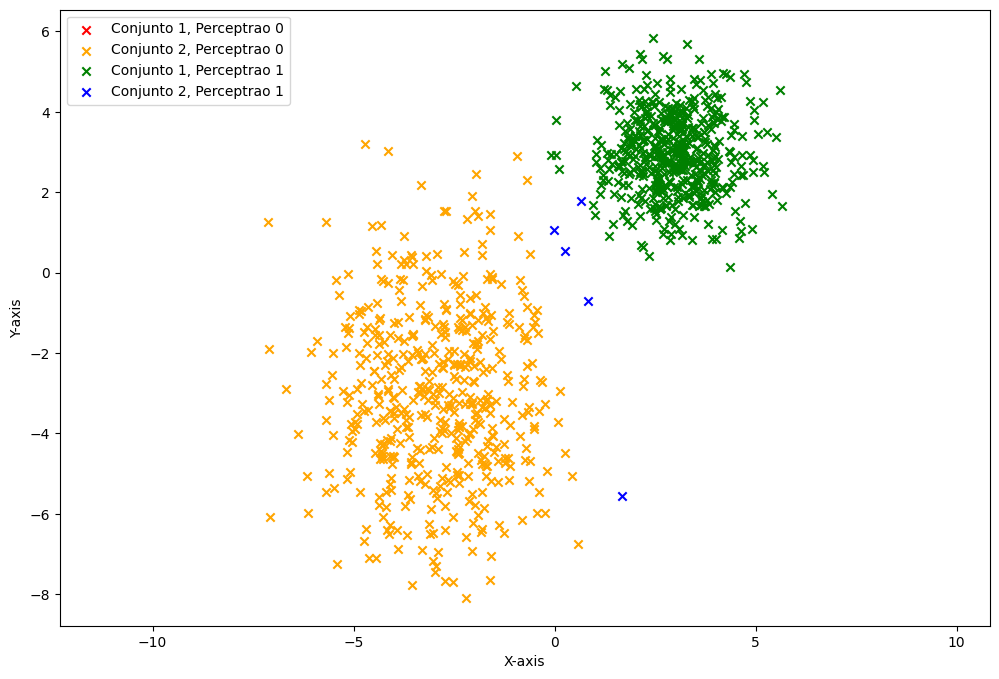

In [14]:
df_c['Group'] = O

plt.figure(figsize=(12, 8))
plt.scatter(df_c[(df_c['Group'] == 0) & (df_c['qualification'] == 0)]['x'],
            df_c[(df_c['Group'] == 0) & (df_c['qualification'] == 0)]['y'],
            color='red', marker='x', label='Conjunto 1, Perceptrao 0')

plt.scatter(df_c[(df_c['Group'] == 0) & (df_c['qualification'] == 1)]['x'],
            df_c[(df_c['Group'] == 0) & (df_c['qualification'] == 1)]['y'],
            color='orange', marker='x', label='Conjunto 2, Perceptrao 0')

plt.scatter(df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 0)]['x'],
            df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 0)]['y'],
            color='green', marker='x', label='Conjunto 1, Perceptrao 1')

plt.scatter(df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 1)]['x'],
            df_c[(df_c['Group'] == 1) & (df_c['qualification'] == 1)]['y'],
            color='blue', marker='x', label='Conjunto 2, Perceptrao 1')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()

- Matriz de confusão do teste com o conjunto gerado

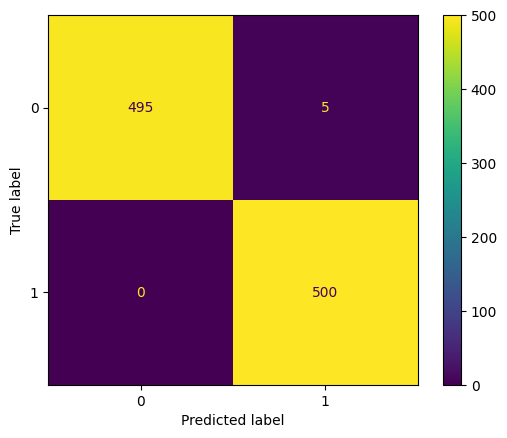

In [15]:
cm = confusion_matrix(target, O)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [16]:
def calculate_accuracy(predictions, ground_truth):
    """
    Calculate the accuracy of predictions against the ground truth.

    Args:
        predictions (list): List of predicted labels.
        ground_truth (list): List of actual labels.

    Returns:
        float: Accuracy score.
    """

    correct = sum([1 for pred, actual in zip(predictions, ground_truth) if pred == actual])
    return correct / len(ground_truth)

def calculate_precision(predictions, ground_truth, positive_class):
    """
    Calculate the precision for a specific class.

    Args:
        predictions (list): List of predicted labels.
        ground_truth (list): List of actual labels.
        positive_class (int): The class considered as positive.

    Returns:
        float: Precision score.
    """

    true_positive = sum([1 for pred, actual in zip(predictions, ground_truth) if pred == actual == positive_class])
    predicted_positive = sum([1 for pred in predictions if pred == positive_class])
    return true_positive / predicted_positive if predicted_positive else 0.0

def calculate_recall(predictions, ground_truth, positive_class):
    """
    Calculate the recall for a specific class.

    Args:
        predictions (list): List of predicted labels.
        ground_truth (list): List of actual labels.
        positive_class (int): The class considered as positive.

    Returns:
        float: Recall score.
    """

    true_positive = sum([1 for pred, actual in zip(predictions, ground_truth) if pred == actual == positive_class])
    actual_positive = sum([1 for actual in ground_truth if actual == positive_class])
    return true_positive / actual_positive if actual_positive else 0.0

def calculate_f1(precision, recall):
    """
    Calculate the F1 score given precision and recall.

    Args:
        precision (float): Precision score.
        recall (float): Recall score.

    Returns:
        float: F1 score.
    """

    return (2 * precision * recall) / (precision + recall) if (precision + recall) else 0.0

# Define the classes
classes = [0, 1]

# Number of iterations for evaluation
iterations = 30

# Lists to store the scores for each iteration
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

for _ in range(iterations):
    # Assuming 'target' and 'O' are defined elsewhere in the code
    ground_truth = target
    predictions = O

    # Calculate metrics
    accuracy = calculate_accuracy(predictions, ground_truth)
    precision = sum(calculate_precision(predictions, ground_truth, c) for c in classes) / len(classes)
    recall = sum(calculate_recall(predictions, ground_truth, c) for c in classes) / len(classes)
    f1 = calculate_f1(precision, recall)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average scores
average_accuracy = sum(accuracy_scores) / iterations
average_precision = sum(precision_scores) / iterations
average_recall = sum(recall_scores) / iterations
average_f1 = sum(f1_scores) / iterations

# Print the average scores
print(f'average_accuracy = {average_accuracy:.0%}')
print(f'average_precision = {average_precision:.3f}')
print(f'average_recall = {average_recall:.3f}')
print(f'average_f1 = {average_f1:.3f}')

average_accuracy = 100%
average_precision = 0.995
average_recall = 0.995
average_f1 = 0.995


## Exercicio 2 - Implementação KNN

In [4]:
dataset_iris = fetch_ucirepo(id=53)

x = dataset_iris.data.features
y = dataset_iris.data.targets

iris = pd.DataFrame.join(x,y)
iris = iris.rename(columns={"class": "Species"})
iris

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


- KNN Algoritmo

In [19]:
class KNN:

    # Constructor
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours

    def fit(self, X, y):
        """ 
        Fit the KNN classifier on the training data
        
        Parameters: 
            X (pd.DataFrame): Training feature data
            y (pd.Series): Training target data (labels). 
        """

        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        """
        Compute the Euclidean distance between two data points
        
        Parameters: 
            X1 (np.array): The first data point
            X2 (np.array): The second data point
            
        Returns: Euclidean distance between X1 and X2 (float)
        """

        return np.linalg.norm(X1 - X2)

    def predict(self, X_test):
        """ 
        Predict the class labels for the provided test data
        
        Parameters: 
            X_test (pd.DataFrame): Test feature data
        
        Returns: Predicted class labels for the test data (list)
        """
        
        final_output = []
        for i in range(len(X_test)):
            distances = []
            votes = []
            for j in range(len(self.X_train)):
                dist = self.distance(self.X_train.iloc[j], X_test.iloc[i])
                distances.append((dist, j))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.n_neighbours]

            for _, j in neighbors:
                votes.append(self.y_train.iloc[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def accuracy(self, X_test, y_test):
        """ 
        Calculate the accuracy of the classifier on the test data
        
        Parameters: 
            X_test (pd.DataFrame): Test feature data
            y_test (pd.Series): True labels for the test data
        
        Returns: Accuracy of the classifier on the test data (float)
        """
        
        predictions = self.predict(X_test)
        return np.sum(predictions == y_test.values) / len(y_test)


- Uma iteração de KNN

In [20]:
shuffled_iris = iris.sample(frac=1, replace=True)
train_df, test_df = train_test_split(shuffled_iris, test_size=0.3)
X_train = train_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y_train = train_df['Species']
X_test = test_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y_test = test_df['Species']

knn_classifier = KNN(n_neighbours=7)
knn_classifier.fit(X_train, Y_train)
predictions = knn_classifier.predict(X_test)
accuracy = knn_classifier.accuracy(X_test, Y_test)

results = pd.DataFrame({
    'Actual': test_df['Species'],
    'Predicted': predictions
}).reset_index(drop=True)

print(results)
print(f"\nAccuracy: {accuracy}")

print("\nMispredicted Cases:")
if len((results[results['Actual'] != results['Predicted']])) != 0:
    print(results[results['Actual'] != results['Predicted']])
else:
    print("No mispredicted cases")

             Actual        Predicted
0       Iris-setosa      Iris-setosa
1   Iris-versicolor  Iris-versicolor
2       Iris-setosa      Iris-setosa
3       Iris-setosa      Iris-setosa
4    Iris-virginica   Iris-virginica
5       Iris-setosa      Iris-setosa
6    Iris-virginica   Iris-virginica
7   Iris-versicolor  Iris-versicolor
8   Iris-versicolor  Iris-versicolor
9    Iris-virginica  Iris-versicolor
10  Iris-versicolor  Iris-versicolor
11  Iris-versicolor  Iris-versicolor
12      Iris-setosa      Iris-setosa
13   Iris-virginica   Iris-virginica
14      Iris-setosa      Iris-setosa
15  Iris-versicolor  Iris-versicolor
16   Iris-virginica   Iris-virginica
17  Iris-versicolor  Iris-versicolor
18   Iris-virginica   Iris-virginica
19   Iris-virginica   Iris-virginica
20  Iris-versicolor  Iris-versicolor
21   Iris-virginica  Iris-versicolor
22      Iris-setosa      Iris-setosa
23      Iris-setosa      Iris-setosa
24      Iris-setosa      Iris-setosa
25   Iris-virginica   Iris-virginica
2

- 30 iterações de KNN  (2min de treino)

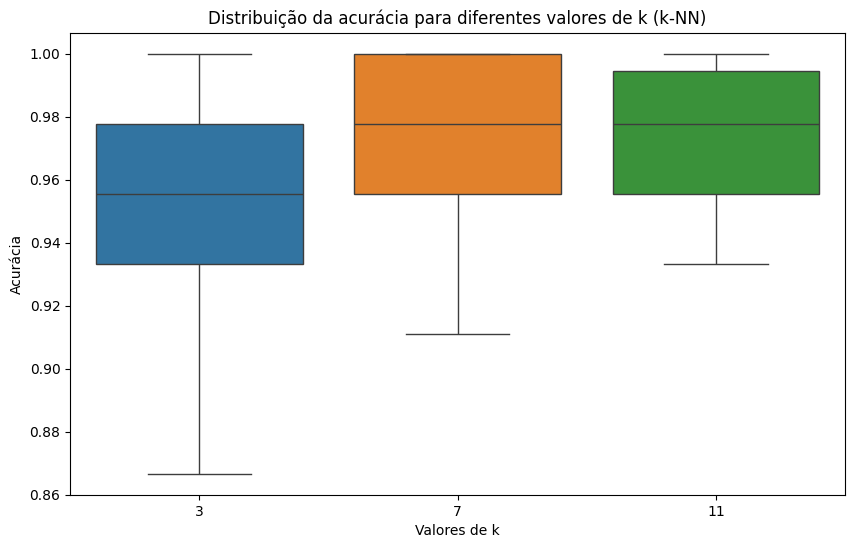

In [21]:
k_values = [3, 7, 11]
accuracy_results = {k: [] for k in k_values}
for k in k_values:
    for _ in range(30):
        shuffled_iris = iris.sample(frac=1, replace=True)
        train_df, test_df = train_test_split(shuffled_iris, test_size=0.3)
        X_train = train_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
        Y_train = train_df['Species']
        X_test = test_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
        Y_test = test_df['Species']

        knn_classifier = KNN(n_neighbours=7)
        knn_classifier.fit(X_train, Y_train)
        predictions = knn_classifier.predict(X_test)
        accuracy = knn_classifier.accuracy(X_test, Y_test)
        accuracy_results[k].append(accuracy)

plt.figure(figsize=(10, 6))

sns.boxplot(data=pd.DataFrame(accuracy_results))

plt.xlabel('Valores de k')

plt.ylabel('Precisão')

plt.title('Distribuição da precisão para diferentes valores de k (k-NN)')

plt.show()

- Matriz de Confusão para cada K

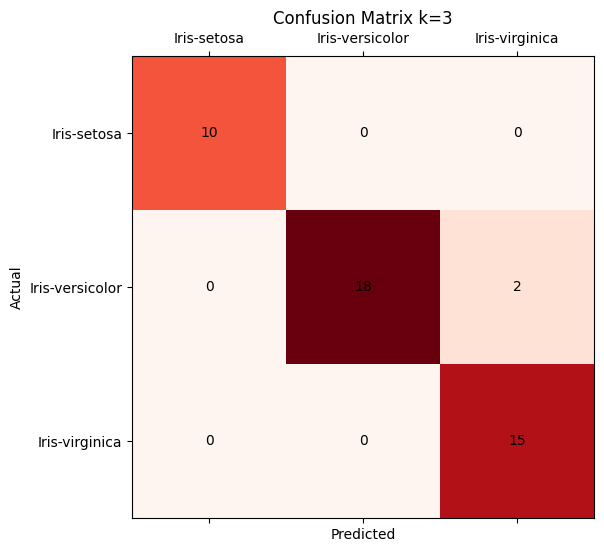

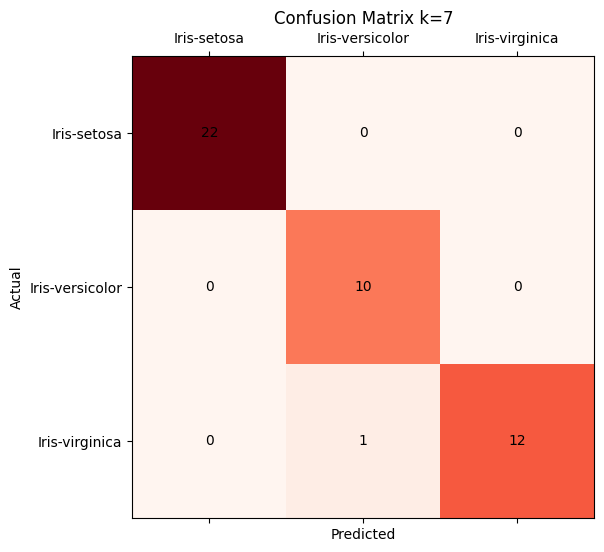

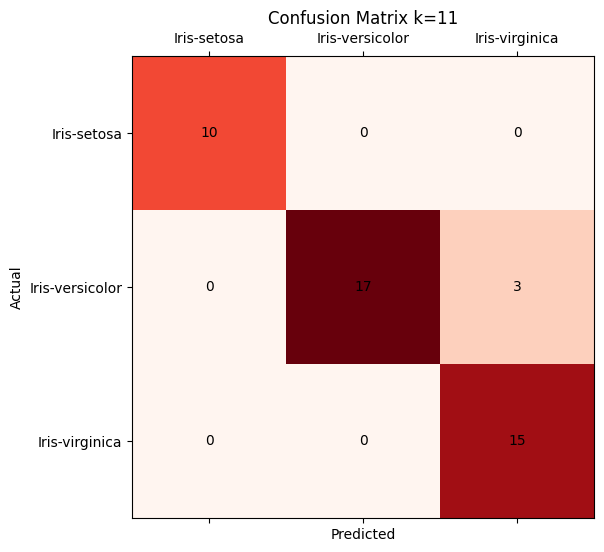

In [22]:
k_values = [3, 7, 11]
for k in k_values:
      shuffled_iris = iris.sample(frac=1, replace=True)
      train_df, test_df = train_test_split(shuffled_iris, test_size=0.3)
      X_train = train_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
      Y_train = train_df['Species']
      X_test = test_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
      Y_test = test_df['Species']

      knn_classifier = KNN(n_neighbours=7)
      knn_classifier.fit(X_train, Y_train)
      predictions = knn_classifier.predict(X_test)
      Y_test = test_df['Species']

      Y_pred = predictions

      classes = sorted(Y_test.unique())

      conf_matrix = pd.DataFrame(np.zeros((len(classes), len(classes)), dtype=int), index=classes, columns=classes)

      for true, pred in zip(Y_test, Y_pred):
          conf_matrix.loc[true, pred] += 1

      fig, ax = plt.subplots(figsize=(8, 6))
      ax.matshow(conf_matrix, cmap="Reds")

      for i in range(len(classes)):
          for j in range(len(classes)):
              ax.text(j, i, str(conf_matrix.iloc[i, j]), va='center', ha='center', color="black")

      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')
      ax.set_xticks(np.arange(len(classes)))
      ax.set_yticks(np.arange(len(classes)))
      ax.set_xticklabels(classes)
      ax.set_yticklabels(classes)
      ax.set_title(f"Confusion Matrix k={k}")

      plt.show()

### Pergunta 2.3

Optar por um valor ímpar para k evita empates na classe maioritária entre os vizinhos mais próximos, assegurando uma maioria clara e facilitando a decisão do classificador.

## Exercicio 3 - Implementação Naïve Bayes

In [23]:
for column in iris.columns[:-1]:
    iris[column] = pd.to_numeric(iris[column], errors='coerce')

for column in iris.columns[:-1]:
    low_thresh, high_thresh = iris[column].quantile([0.33, 0.66])
    iris[column] = pd.cut(iris[column], bins=[-float('inf'), low_thresh, high_thresh, float('inf')], labels=['low', 'medium', 'high'])

iris

,sepal length,sepal width,petal length,petal width,Species
0,low,high,low,low,Iris-setosa
1,low,medium,low,low,Iris-setosa
2,low,medium,low,low,Iris-setosa
3,low,medium,low,low,Iris-setosa
4,low,high,low,low,Iris-setosa
...,...,...,...,...,...
145,high,medium,high,high,Iris-virginica
146,high,low,high,high,Iris-virginica
147,high,medium,high,high,Iris-virginica
148,medium,high,high,high,Iris-virginica


- Algoritmo Naive Bayes

In [24]:
class NaiveBayesClassifier:

    # Constructor
    def __init__(self, x_train):
        self.probability = {}
        self.x = x_train.drop(columns=['Species'])
        self.y = x_train['Species']
        self.probability_y = {}
        self.predictions = None
        self.y_test = None

    def probabilities(self):
        """ 
        Calculate the probabilities for each value in each column given each species. 
        """
        
        self.probability_y = self.y.value_counts(normalize=True).to_dict()
        for column in self.x.columns:
            unique_values = self.x[column].unique()
            for value in unique_values:
                for species in self.y.unique():
                    name = f"{column}_{value}_{species}"
                    count = ((self.x[column] == value) & (self.y == species)).sum()
                    self.probability[name] = count / len(self.x)

    def predict(self, x_test):
        """ 
        Predict species for the test data. 
        
        Parameters: 
            x_test (pd.DataFrame): Test dataset including features and 'Species' column
        
        Returns: Predicted species for each instance in the test set (np.array)
        """

        self.y_test = x_test['Species'].values
        x_test = x_test.drop(columns=['Species'])
        predictions = []

        for _, row in x_test.iterrows():
            best_species = None
            max_proba = -1

            for species in self.y.unique():
                proba_specie = 1

                for column in self.x.columns:
                    value = row[column]
                    key = f"{column}_{value}_{species}"
                    proba_specie *= self.probability.get(key, 1e-10)

                if proba_specie > max_proba:
                    max_proba = proba_specie
                    best_species = species

            predictions.append(best_species)

        self.predictions = np.array(predictions)
        return self.predictions

    def accuracy(self):
        """ 
        Calculate the accuracy of the classifier
        
        Returns: Accuracy of the predictions (float)
        """

        correct_predictions = sum(self.predictions == self.y_test)
        total_predictions = len(self.y_test)
        return correct_predictions / total_predictions

- Uma iteração de Naive Bayes

In [25]:
shuffled_iris = iris.sample(frac=1, replace=True)
train_df, test_df = train_test_split(shuffled_iris, test_size=0.3)
X_train = pd.DataFrame(train_df)
X_test = pd.DataFrame(test_df)

classifier = NaiveBayesClassifier(X_train)
classifier.probabilities()
predictions = classifier.predict(X_test)
accuracy = classifier.accuracy()

results = pd.DataFrame({'Actual': test_df['Species'], 'Predicted': predictions}).reset_index(drop=True)

print(results)
print(f"\nAccuracy: {accuracy}")

print("\nMispredicted Cases:")
if len((results[results['Actual'] != results['Predicted']])) != 0:
    print(results[results['Actual'] != results['Predicted']])
else:
    print("No mispredicted cases")

             Actual        Predicted
0    Iris-virginica   Iris-virginica
1    Iris-virginica   Iris-virginica
2   Iris-versicolor  Iris-versicolor
3   Iris-versicolor  Iris-versicolor
4       Iris-setosa      Iris-setosa
5    Iris-virginica   Iris-virginica
6       Iris-setosa      Iris-setosa
7   Iris-versicolor  Iris-versicolor
8    Iris-virginica  Iris-versicolor
9   Iris-versicolor  Iris-versicolor
10      Iris-setosa      Iris-setosa
11   Iris-virginica   Iris-virginica
12      Iris-setosa      Iris-setosa
13   Iris-virginica   Iris-virginica
14   Iris-virginica  Iris-versicolor
15  Iris-versicolor  Iris-versicolor
16  Iris-versicolor  Iris-versicolor
17      Iris-setosa      Iris-setosa
18   Iris-virginica   Iris-virginica
19   Iris-virginica  Iris-versicolor
20   Iris-virginica   Iris-virginica
21  Iris-versicolor  Iris-versicolor
22      Iris-setosa      Iris-setosa
23   Iris-virginica   Iris-virginica
24  Iris-versicolor  Iris-versicolor
25  Iris-versicolor  Iris-versicolor
2

- 30 iterações de Naive Bayes

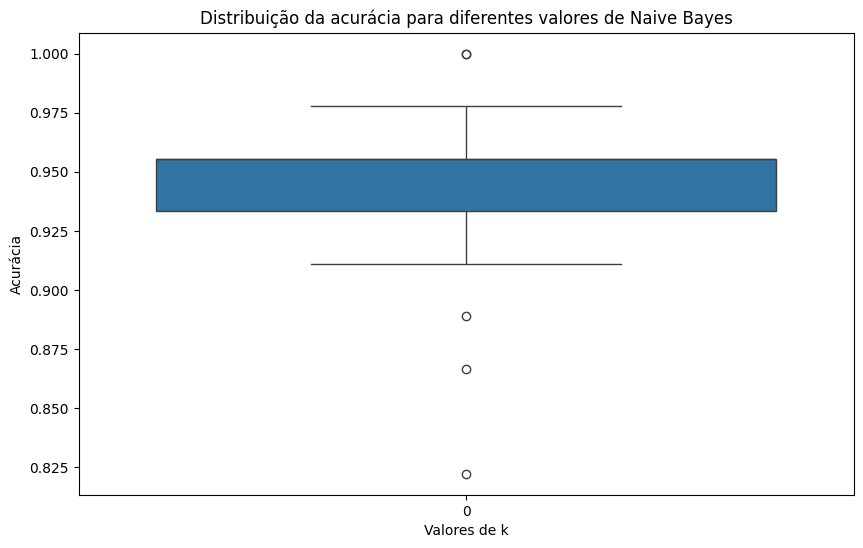

In [26]:
accuracy_results = []

for _ in range(30):
    shuffled_iris = iris.sample(frac=1, replace=True)
    train_df, test_df = train_test_split(shuffled_iris, test_size=0.3)
    X_train = pd.DataFrame(train_df)
    X_test = pd.DataFrame(test_df)

    classifier = NaiveBayesClassifier(X_train)
    classifier.probabilities()
    predictions = classifier.predict(X_test)
    accuracy = classifier.accuracy()
    accuracy_results.append(accuracy)

plt.figure(figsize=(10, 6))

sns.boxplot(data=pd.DataFrame(accuracy_results))

plt.xlabel('Valores de k')

plt.ylabel('Acurácia')

plt.title('Distribuição da acurácia para diferentes valores de Naive Bayes')

plt.show()

- Matriz de Confusão de Naive Bayes

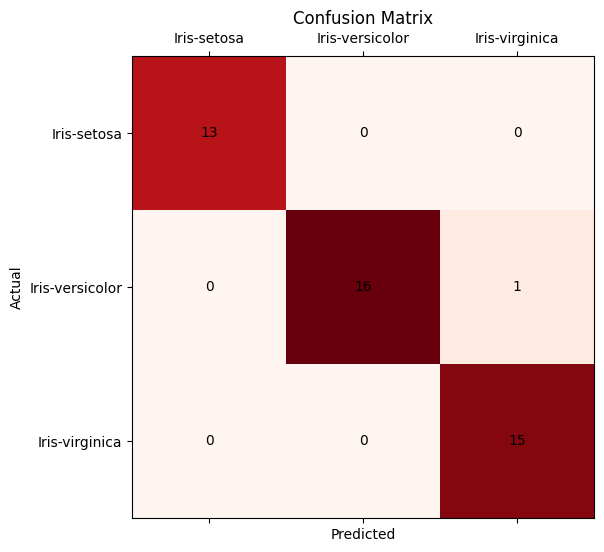

In [27]:
Y_test = test_df['Species']
Y_pred = predictions

classes = sorted(Y_test.unique())

conf_matrix = pd.DataFrame(np.zeros((len(classes), len(classes)), dtype=int), index=classes, columns=classes)

for true, pred in zip(Y_test, Y_pred):
    conf_matrix.loc[true, pred] += 1

fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(conf_matrix, cmap="Reds")

for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, str(conf_matrix.iloc[i, j]), va='center', ha='center', color="black")

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set_title("Confusion Matrix")

plt.show()

### Pergunta 3.2

- **Naive Bayes (NB)**: Tende a ser mais rápido e eficiente, mas pode ser menos preciso se as características dos dados não forem independentes. Ele é rápido porque calcula apenas estatísticas (média e variância) para cada classe e faz previsões baseadas nisso.

- **k-Nearest Neighbors (k-NN)**: Tende a ser mais lento porque calcula a distância entre cada ponto de teste e os pontos de treino. No entanto, pode ser mais preciso, especialmente em conjuntos de dados onde as características são correlacionadas e a suposição de independência do Naive Bayes não se aplica bem.

## Exercicio 4

In [28]:
# fetch dataset
dataset_iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
x = dataset_iris.data.features
y = dataset_iris.data.targets

iris = pd.DataFrame.join(x,y)
iris = iris.rename(columns={"class": "Species"})

for column in iris.columns[:-1]:
    iris[column] = pd.to_numeric(iris[column], errors='coerce')

for column in iris.columns[:-1]:
    low_thresh, high_thresh = iris[column].quantile([0.33, 0.66])
    iris[column] = pd.cut(iris[column], bins=[-float('inf'), low_thresh, high_thresh, float('inf')], labels=['low', 'medium', 'high'])

iris

,sepal length,sepal width,petal length,petal width,Species
0,low,high,low,low,Iris-setosa
1,low,medium,low,low,Iris-setosa
2,low,medium,low,low,Iris-setosa
3,low,medium,low,low,Iris-setosa
4,low,high,low,low,Iris-setosa
...,...,...,...,...,...
145,high,medium,high,high,Iris-virginica
146,high,low,high,high,Iris-virginica
147,high,medium,high,high,Iris-virginica
148,medium,high,high,high,Iris-virginica


In [29]:
def calculate_entropy(p_positive, total_samples):
    """
    Compute the entropy of one set
    
    Parameters:
        p_positive (int): number of examples classified as iris-setosa
        total_samples (int): number of examples

    Returns: The entropy value (float)
    """

    p_negative = total_samples - p_positive
    
    if p_positive == 0 or p_negative == 0:
        return 0
    
    p_positive_prob = p_positive / total_samples
    p_negative_prob = p_negative / total_samples
    
    return -(p_positive_prob) * math.log2(p_positive_prob) - (p_negative_prob) * math.log2(p_negative_prob)

def calculate_gain(entropy, subsets, original_size):
    """ 
    Calculate the information gain for a given set of subsets
    
    Parameters: 
        entropy (float): The entropy of the original set
        subsets (list): A list of subsets to calculate gain for 
        original_size (int): The size of the original set. 
        
    Returns: The information gain after splitting (float). 
    """

    gain = entropy
    
    for subset in subsets:
        subset_size = len(subset)
        p_positive_subset = (subset['Species'] == 'Iris-setosa').sum()
        subset_entropy = calculate_entropy(p_positive_subset, subset_size)
        gain -= (subset_size / original_size) * subset_entropy
    
    return gain

# Create the list of examples sepal length feature is low, medium or hight
Low = iris.loc[iris['sepal length'] == 'low']
Medium = iris.loc[iris['sepal length'] == 'medium']
High = iris.loc[iris['sepal length'] == 'high']

# Compute the values needed for call the functions to compute entropy

p_pos = (iris['Species'] == 'Iris-setosa').sum()
iris_length = len(iris)
entropy_S = calculate_entropy(p_pos, iris_length)

p_pos_L = (Low['Species'] == 'Iris-setosa').sum()
entropy_L = calculate_entropy(p_pos_L, len(Low))

p_pos_M = (Medium['Species'] == 'Iris-setosa').sum()
entropy_M = calculate_entropy(p_pos_M, len(Medium))

p_pos_H = (High['Species'] == 'Iris-setosa').sum()
entropy_H = calculate_entropy(p_pos_H, len(High))

# Compute the values needed for call the function to compute gain
subsets = [Low, Medium, High]
gain = calculate_gain(entropy_S, subsets, iris_length)

# Print values of entropy and gain
print(f'Entropy(S) = {entropy_S:.3f}')
print(f'Entropy(Low) = {entropy_L:.3f}')
print(f'Entropy(Medium) = {entropy_M:.3f}')
print(f'Entropy(High) = {entropy_H:.3f}')
print(f'Information Gain (Sepal Length) = {gain:.3f}')


Entropy(S) = 0.918
Entropy(Low) = 0.570
Entropy(Medium) = 0.489
Entropy(High) = 0.000
Information Gain (Sepal Length) = 0.568


In [30]:
# Calculo do ganho para cada caraterística
features = ['sepal length','sepal width', 'petal length', 'petal width']

for feature in features:
    low_subset = iris[iris[feature] == 'low']
    medium_subset = iris[iris[feature] == 'medium']
    high_subset = iris[iris[feature] == 'high']
    subsets = [low_subset, medium_subset, high_subset]

    gain = calculate_gain(entropy_S, subsets, iris_length)
    print(f'Information Gain ({feature}) = {gain:.3f}')

Information Gain (sepal length) = 0.568
Information Gain (sepal width) = 0.308
Information Gain (petal length) = 0.918
Information Gain (petal width) = 0.918


### Pergunta 4.3

Para a classificação de novas amostras de íris, o comprimento e a largura das pétalas são as características mais relevantes para prever a espécie. 

Esses resultados indicam que o classificador pode ser altamente eficaz ao focar principalmente nessas duas features, pois elas capturam informações específicas e distintivas de cada classe.

### Pergunta 4.4

Usar a feature com o maior ganho de informação para a primeira divisão da árvore. Essa feature maximiza a redução de incerteza e é a mais informativa.

**Criação do Nó Raiz**: Usar a feature com o maior ganho de informação como a raiz da árvore e criar ramificações para cada valor possível dessa feature.

**Divisões Recursivas**: Para cada ramo criado, repetir o processo nos subconjuntos, excluindo a feature já utilizada. Recalcular o ganho de informação das features restantes e escolher a que mais reduz a incerteza.